In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
data = pd.read_csv('tennis_stats.csv')
data.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [22]:
data.info();
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
Player                        1721 non-null object
Year                          1721 non-null int64
FirstServe                    1721 non-null float64
FirstServePointsWon           1721 non-null float64
FirstServeReturnPointsWon     1721 non-null float64
SecondServePointsWon          1721 non-null float64
SecondServeReturnPointsWon    1721 non-null float64
Aces                          1721 non-null int64
BreakPointsConverted          1721 non-null float64
BreakPointsFaced              1721 non-null int64
BreakPointsOpportunities      1721 non-null int64
BreakPointsSaved              1721 non-null float64
DoubleFaults                  1721 non-null int64
ReturnGamesPlayed             1721 non-null int64
ReturnGamesWon                1721 non-null float64
ReturnPointsWon               1721 non-null float64
ServiceGamesPlayed            1721 non-null int64
ServiceGamesWon         

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [ ]:
Во всех признаках одинаковое число объектов, пропущенных значений нет.

In [4]:
data.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


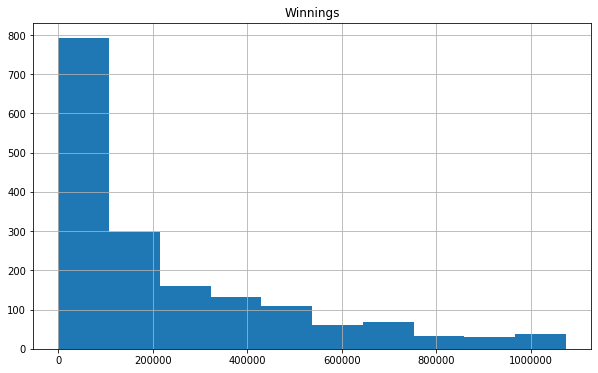

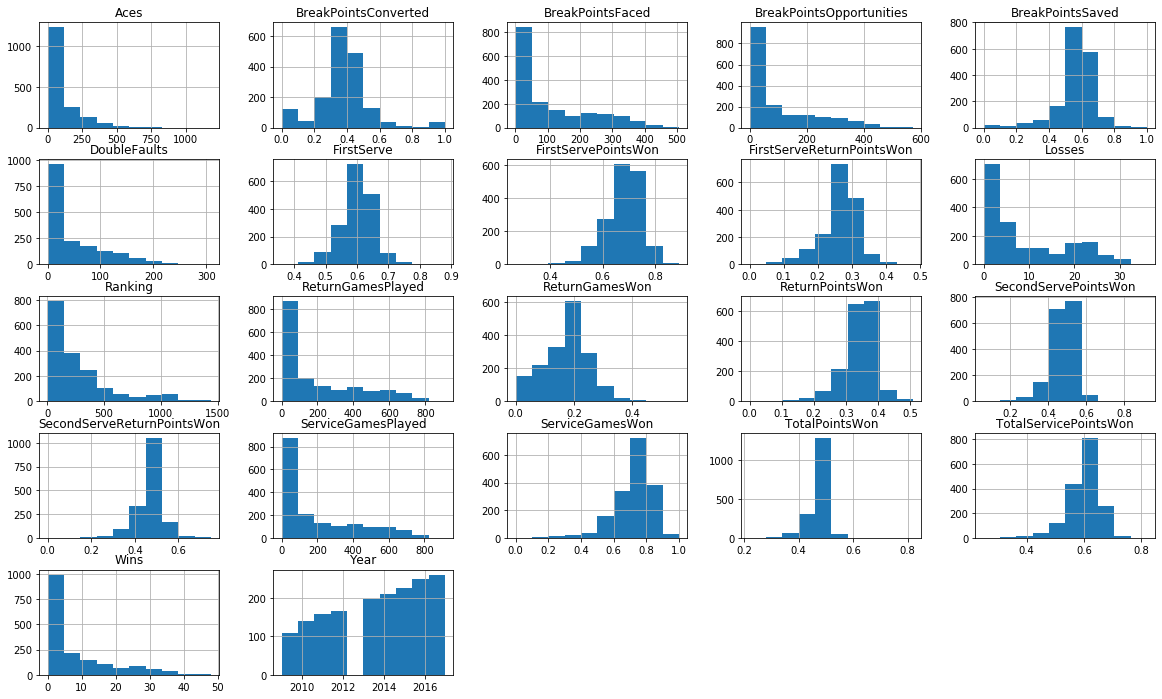

In [5]:
# посмотрим на распределение таргета и признаков
target = ['Winnings']
data[target].hist(figsize=(10,6));
features_to_check = list(set(data.columns) - set(['Winnings']))
data[features_to_check].hist(figsize=(20,12));

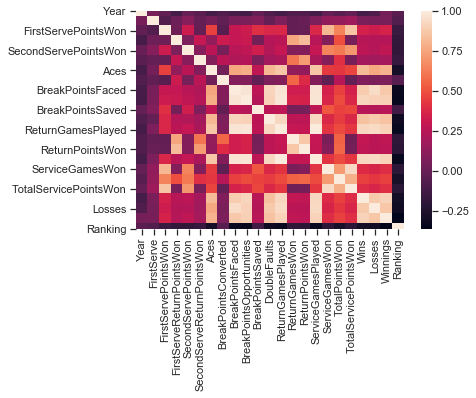

In [110]:
# Проверим корреляцию признаков
sns.heatmap(data.corr())

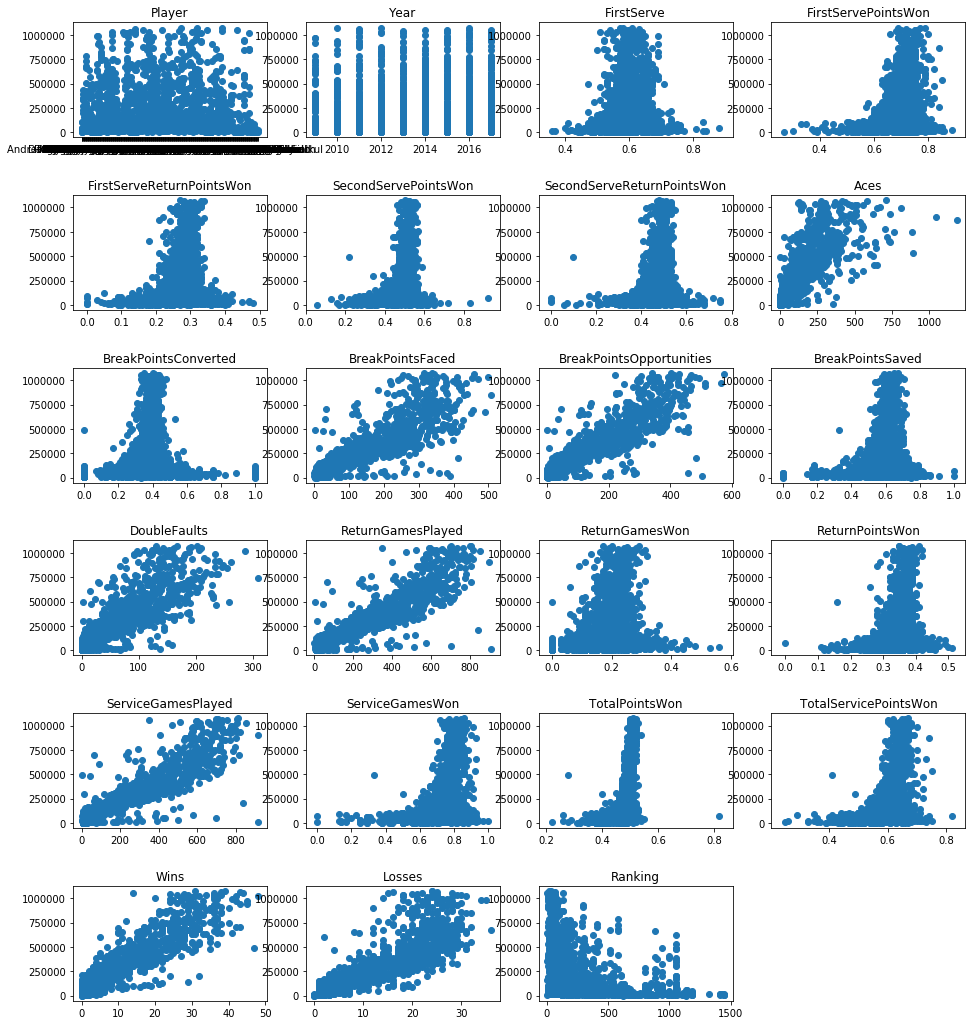

In [23]:
# построим зависимости признаков и таргета
fig=plt.figure(figsize=(16, 18))
for i, col in enumerate(data.drop(['Winnings'], axis=1).columns):
    ax=plt.subplot(6, 4, i + 1)
    ax.scatter(data[col], data['Winnings'])
    plt.title(col)
    plt.subplots_adjust(hspace=.5)

Из диаграммы корреляций видно, что некоторые данные существенно коррелируют между собой, что в общем-то и ожидалось. Например, Losses, Wins и Ranking. Зависимость таргета и предикторов визуально не везде линейная. Тем не менее, в качестве baseline я обучу линейную модель и проверю ее среднеквадратичную ошибку. 

In [50]:
X, y = data.drop(['Winnings', 'Player'], axis=1), data['Winnings']

In [55]:
X_train_size = int(.7 * data.shape[0])
X_train, X_test = X.loc[:X_train_size-1, :], X.loc[X_train_size:, :]
y_train, y_test = y[:X_train_size], y[X_train_size:]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
lr = LinearRegression()
ridge = Ridge(random_state=43)
lasso = Lasso(random_state=43)
ridge_cv = RidgeCV()
lasso_cv = LassoCV(random_state=43)

In [72]:
def train_test_lmodels(model, X_train_scaled, X_test_scaled, y_train, y_test, feature_names=X.columns):
    model.fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test_scaled))
    print('MSE ' + str(model) +  ' - %d' %mse)
    print('Модель ошибается на %d' %np.sqrt(mse) + ' при среднем выигрыше примерно в 234493')
    print(pd.DataFrame(model.coef_, X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

In [73]:
train_test_lmodels(lr, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

MSE LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) - 5117260598
Модель ошибается на 71535 при среднем выигрыше примерно в 234493
                                     coef
ServiceGamesPlayed          205542.739880
Wins                        128264.011155
Year                         41387.683094
Losses                       39138.438980
BreakPointsOpportunities     35790.693974
DoubleFaults                 30593.523599
FirstServeReturnPointsWon    14366.978555
SecondServeReturnPointsWon    9723.019366
TotalServicePointsWon         6969.225120
BreakPointsConverted          5524.072290
BreakPointsSaved              4430.954472
ReturnGamesWon                -471.851224
FirstServePointsWon           -572.495787
SecondServePointsWon          -859.691638
ServiceGamesWon              -2239.990544
FirstServe                   -4901.008052
TotalPointsWon               -6233.880947
Aces                        -14435.770031
ReturnPointsWon             -17470.68061

In [74]:
# Линейная регрессия присвоила признакам огромные веса. Попробуем улучшить результаты
train_test_lmodels(lasso, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

MSE Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=43,
      selection='cyclic', tol=0.0001, warm_start=False) - 5098816672
Модель ошибается на 71405 при среднем выигрыше примерно в 234493
                                     coef
Wins                        129295.338622
ServiceGamesPlayed           52814.579529
ReturnGamesPlayed            48922.173698
Year                         41410.679658
Losses                       37099.560249
BreakPointsOpportunities     32783.304462
DoubleFaults                 30959.768656
FirstServeReturnPointsWon    13966.845274
SecondServeReturnPointsWon    9499.058488
BreakPointsConverted          5388.958241
TotalServicePointsWon         4955.184375
BreakPointsSaved              4342.554718
FirstServePointsWon             -0.000000
ReturnGamesWon                -426.312604
SecondServePointsWon          -542.676859
ServiceGamesWon              -1820.022203
FirstServ

Lasso регрессия занулила один из признаков (FirstServePointsWon) в борьбе с мультиколлинеарностью, mse несколько уменьшилось

In [76]:
train_test_lmodels(ridge, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

MSE Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=43, solver='auto', tol=0.001) - 5091171308
Модель ошибается на 71352 при среднем выигрыше примерно в 234493
                                     coef
Wins                        128929.902850
ServiceGamesPlayed           69105.450654
Year                         41405.459808
Losses                       36970.484916
BreakPointsOpportunities     34846.025558
DoubleFaults                 30298.064830
ReturnGamesPlayed            23276.533420
FirstServeReturnPointsWon    13785.385195
SecondServeReturnPointsWon    9447.880193
BreakPointsConverted          5501.022165
TotalServicePointsWon         5187.088177
BreakPointsSaved              4103.095457
FirstServePointsWon              8.922902
SecondServePointsWon          -467.777835
ReturnGamesWon                -660.022999
ServiceGamesWon              -1589.307032
FirstServe                   -4704.465800
TotalPointsWon               -5

In [77]:
#Попробуем настроить регуляризацию
train_test_lmodels(lasso_cv, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

MSE LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=43, selection='cyclic',
        tol=0.0001, verbose=False) - 5035318582
Модель ошибается на 70959 при среднем выигрыше примерно в 234493
                                     coef
Wins                        132848.658483
ServiceGamesPlayed           41610.784192
Year                         40971.028820
Losses                       30200.045234
DoubleFaults                 26399.675738
BreakPointsOpportunities     26202.277758
ReturnGamesPlayed            19298.889589
BreakPointsConverted          4099.632194
FirstServeReturnPointsWon     3755.076425
SecondServeReturnPointsWon    2208.138856
BreakPointsSaved              1739.813080
ServiceGamesWon               1692.063975
FirstServePointsWon              0.000000
Aces                            -0.000000
TotalServicePointsWon         

In [80]:
train_test_lmodels(ridge_cv, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

MSE RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False) - 5010316281
Модель ошибается на 70783 при среднем выигрыше примерно в 234493
                                     coef
Wins                        125396.430862
Year                         41124.899043
ServiceGamesPlayed           35754.836219
BreakPointsOpportunities     35319.404119
Losses                       33287.687383
ReturnGamesPlayed            29863.219657
DoubleFaults                 26981.801227
FirstServeReturnPointsWon    11035.366526
SecondServeReturnPointsWon    7757.021708
BreakPointsConverted          5362.320299
TotalServicePointsWon         3885.991735
BreakPointsSaved              2931.390990
FirstServePointsWon           1233.703342
SecondServePointsWon           451.972665
ServiceGamesWon               -447.728319
ReturnGamesWon                -979.290382
Aces                         -1349.320332
FirstServe    

Можно отдельно запустить RidgeCV и LassoCV, передать им заданный вручную список alphas, возможно перебираемые по умолчанию альфы (их можно посмотреть lasso(ridge)_cv.alphas_) для данного случая не самые оптимальные, но я закончу на этом с линейными моделями, в качестве baseline оставлю результаты ridge_cv и попробую обучить случайный лес и сравнить качество модели.

In [85]:
forest = RandomForestRegressor(random_state=43)
forest.fit(X_train, y_train)
forest_mse = mean_squared_error(y_test, forest.predict(X_test))
print('MSE случайного леса - %d' %forest_mse)
print('Модель ошибается на %d' %np.sqrt(forest_mse) + ' при среднем выигрыше примерно в 234493')
print(pd.DataFrame(forest.feature_importances_, X.columns, columns=['importance']).sort_values
      (by='importance', ascending=False))

MSE случайного леса - 3457642032
Модель ошибается на 58801 при среднем выигрыше примерно в 234493
                            importance
Wins                          0.319486
ReturnGamesPlayed             0.304365
ServiceGamesPlayed            0.115991
Losses                        0.097929
BreakPointsOpportunities      0.054648
Year                          0.033366
Ranking                       0.016565
DoubleFaults                  0.008467
BreakPointsSaved              0.005431
BreakPointsFaced              0.005248
BreakPointsConverted          0.004334
ReturnGamesWon                0.004261
SecondServePointsWon          0.004236
FirstServeReturnPointsWon     0.004147
ServiceGamesWon               0.004064
FirstServe                    0.003385
SecondServeReturnPointsWon    0.002756
Aces                          0.002724
TotalPointsWon                0.002666
ReturnPointsWon               0.002378
FirstServePointsWon           0.002240
TotalServicePointsWon         0.001311


Случайный лес сработал существенно лучше, попробуем подобрать оптимальные параметры

In [90]:
parameters = {'max_depth': [1, 2, 5, 8, 10, 12, 15, 17, 20, 50],
            'n_estimators': [50, 100, 200, 300, 500, 600, 700, 800]}

gs = GridSearchCV(forest, parameters)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 17, 'n_estimators': 600}


In [91]:
best_forest = RandomForestRegressor(random_state=43, max_depth=17, n_estimators=600)
best_forest.fit(X_train, y_train)
best_forest_mse = mean_squared_error(y_test, best_forest.predict(X_test))
print('MSE случайного леса - %d' %best_forest_mse)
print('Модель ошибается на %d' %np.sqrt(best_forest_mse) + ' при среднем выигрыше примерно в 234493')
print(pd.DataFrame(best_forest.feature_importances_, X.columns, columns=['importance']).sort_values
      (by='importance', ascending=False))

MSE случайного леса - 2866250117
Модель ошибается на 53537 при среднем выигрыше примерно в 234493
                            importance
Wins                          0.421891
ReturnGamesPlayed             0.181974
ServiceGamesPlayed            0.159724
Losses                        0.085795
BreakPointsOpportunities      0.045589
Year                          0.032358
Ranking                       0.015594
BreakPointsFaced              0.008103
DoubleFaults                  0.006556
Aces                          0.004864
BreakPointsConverted          0.004476
BreakPointsSaved              0.004035
ReturnGamesWon                0.003952
SecondServePointsWon          0.003865
FirstServe                    0.003104
FirstServePointsWon           0.002874
SecondServeReturnPointsWon    0.002808
TotalPointsWon                0.002735
ServiceGamesWon               0.002704
FirstServeReturnPointsWon     0.002504
TotalServicePointsWon         0.002382
ReturnPointsWon               0.002115
